In [55]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [2]:
df=pd.read_csv("bank.csv")

In [3]:
df.head()

,age,job,marital,education,default,balance,housing-loan,personal-loan,current-campaign,previous-campaign,subscribed
0,30,unemployed,married,primary,no,1787,no,no,1,0,no
1,33,services,married,secondary,no,4789,yes,yes,1,4,no
2,35,management,single,tertiary,no,1350,yes,no,1,1,no
3,30,management,married,tertiary,no,1476,yes,yes,4,0,no
4,59,blue-collar,married,secondary,no,0,yes,no,1,0,no


In [4]:
df['job'].value_counts()

management       969
blue-collar      946
technician       768
admin.           478
services         417
retired          230
self-employed    183
entrepreneur     168
unemployed       128
housemaid        112
student           84
unknown           38
Name: job, dtype: int64

In [5]:
df['education'].value_counts()

secondary    2306
tertiary     1350
primary       678
unknown       187
Name: education, dtype: int64

In [6]:
df['marital'].value_counts()

married     2797
single      1196
divorced     528
Name: marital, dtype: int64

In [7]:
df.isnull().any()

age                  False
job                  False
marital              False
education            False
default              False
balance              False
housing-loan         False
personal-loan        False
current-campaign     False
previous-campaign    False
subscribed           False
dtype: bool

In [8]:
cols=['job','education']
df[cols]=df[cols].replace({"unknown" : np.NaN})

In [9]:
df.isnull().any()

age                  False
job                   True
marital              False
education             True
default              False
balance              False
housing-loan         False
personal-loan        False
current-campaign     False
previous-campaign    False
subscribed           False
dtype: bool

## $Observation$
#### As we know there are less null values in the 'job' field is less so we can replace it by mean-mode method

In [10]:
df["job"].fillna(df['job'].mode()[0],inplace=True)

In [11]:
df.isnull().any()

age                  False
job                  False
marital              False
education             True
default              False
balance              False
housing-loan         False
personal-loan        False
current-campaign     False
previous-campaign    False
subscribed           False
dtype: bool

In [12]:
df['education'].isnull().sum()

187

#### As we know there are less null values in the 'education' field is more so we can replace it by highest occurance field and incase any null values still exist we will go ahead with mean-mode method

In [13]:
a=df.groupby(['job','education'])

In [14]:
a.size()

job            education
admin.         primary       17
               secondary    393
               tertiary      51
blue-collar    primary      369
               secondary    524
               tertiary      12
entrepreneur   primary       26
               secondary     58
               tertiary      73
housemaid      primary       57
               secondary     28
               tertiary      22
management     primary       46
               secondary    124
               tertiary     795
retired        primary       80
               secondary    105
               tertiary      31
self-employed  primary       15
               secondary     76
               tertiary      88
services       primary       25
               secondary    363
               tertiary      16
student        primary        2
               secondary     47
               tertiary      19
technician     primary       15
               secondary    520
               tertiary     211
unemployed     

In [15]:
def rep(cols):
    job=cols[1]
    education=cols[0]
    if pd.isnull(education):
        if job == "admin":
            return 'secondary'
        elif job == "blue-collar":
            return 'secondary'
        elif job == 'entrepreneur':
            return 'secondary'
        elif job == 'unemployed':
            return 'secondary'
        elif job == 'housemaid':
            return 'primary'
        elif job == 'management':
            return 'tertiary'
        elif job == 'retired':
            return 'secondary'
        elif job == 'self-employed':
            return 'tertiary'
        elif job == 'services':
            return 'secondary'
        elif job == 'student':
            return 'secondary'
        elif job == 'technician':
            return 'secondary'
    else:
        return education

In [16]:
df['education']=df[['education','job']].apply(rep,axis=1)

In [17]:
df['education'].isnull().sum()

17

In [18]:
df['education'].fillna(df['education'].mode()[0],inplace=True)

In [19]:
df['education'].isnull().sum()

0

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 11 columns):
age                  4521 non-null int64
job                  4521 non-null object
marital              4521 non-null object
education            4521 non-null object
default              4521 non-null object
balance              4521 non-null int64
housing-loan         4521 non-null object
personal-loan        4521 non-null object
current-campaign     4521 non-null int64
previous-campaign    4521 non-null int64
subscribed           4521 non-null object
dtypes: int64(4), object(7)
memory usage: 388.6+ KB


In [21]:
df['previous-campaign'].value_counts()

0     3705
1      286
2      193
3      113
4       78
5       47
6       25
7       22
8       18
9       10
12       5
10       4
11       3
14       2
20       1
24       1
23       1
13       1
17       1
19       1
18       1
22       1
15       1
25       1
Name: previous-campaign, dtype: int64

In [22]:
df['previous-campaign'].count()

4521

### From 4521 there are 3705 persons have not participated in the campaign, so this data is not usefull for us so we can either ignore it or we can drop it.

# - Finding the relation between different fields through visualization

C:\Users\Data Science.DESKTOP-2NH7VUI\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


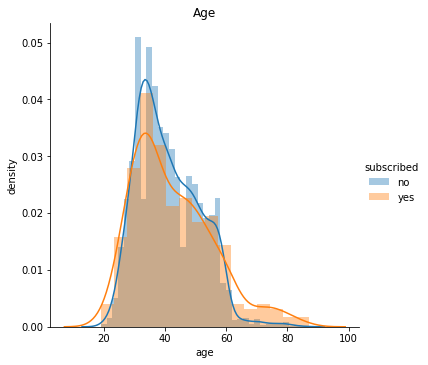

In [23]:

sb.FacetGrid(df, hue="subscribed", size=5).map(sb.distplot, "age").add_legend()
plt.title("Age")
plt.ylabel("density")
plt.show()


# Persons those who age is in between 30 and 60 have done term deposit

C:\Users\Data Science.DESKTOP-2NH7VUI\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


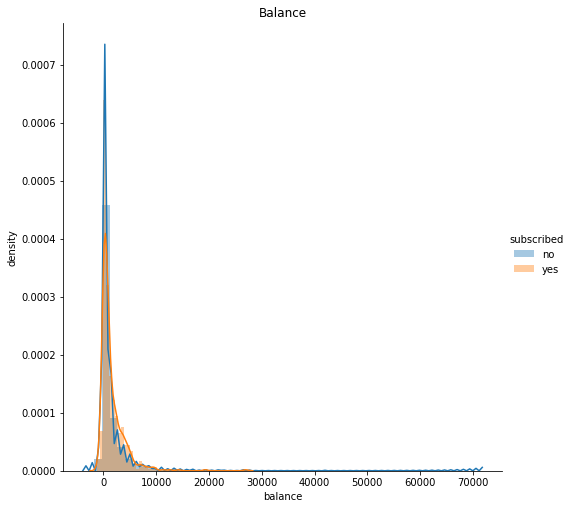

In [116]:
sb.FacetGrid(df, hue="subscribed", size=7).map(sb.distplot, "balance").add_legend()
plt.title("Balance")
plt.ylabel("density")
plt.show()

# Clients having balance less than 8000 have done term deposit

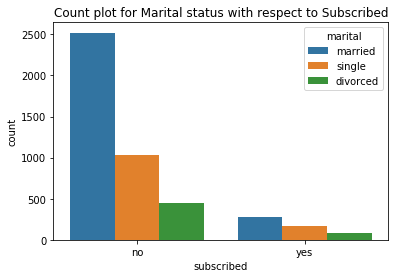

In [25]:
sb.countplot(data=df,x="subscribed",hue="marital")
plt.title("Count plot for Marital status with respect to Subscribed")
plt.show()


# We can't derive by looking to the marital status 

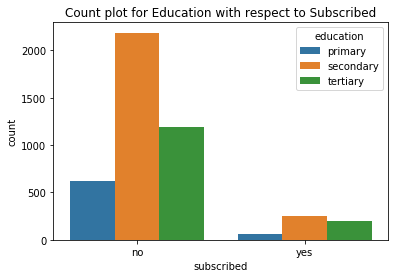

In [26]:
sb.countplot(data=df,x="subscribed",hue="education")
plt.title("Count plot for Education with respect to Subscribed")
plt.show()

# Education background having Secondary and Tertiary have subscribed to term deposit

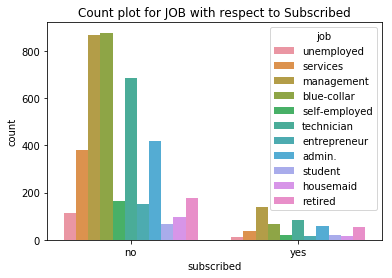

In [27]:
sb.countplot(data=df,x="subscribed",hue="job")
plt.title("Count plot for JOB with respect to Subscribed")
plt.show()

# Clients into the field management, technician, admin, retired have opted more for the term deposit

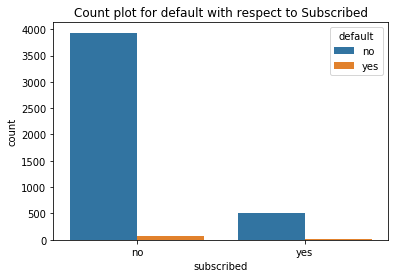

In [28]:
sb.countplot(data=df,x="subscribed",hue="default")
plt.title("Count plot for default with respect to Subscribed")
plt.show()

# Maximum client are Non defaulter 

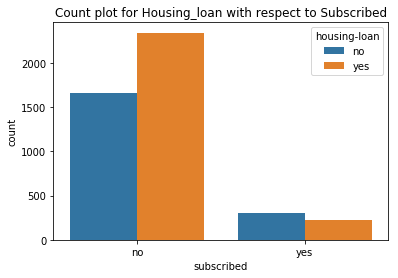

In [29]:
sb.countplot(data=df,x="subscribed",hue="housing-loan")
plt.title("Count plot for Housing_loan with respect to Subscribed")
plt.show()

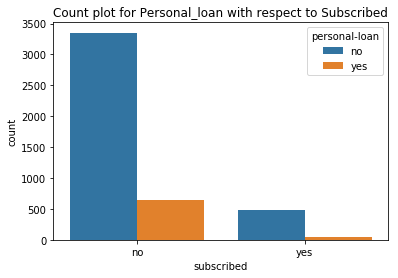

In [30]:
sb.countplot(data=df,x="subscribed",hue="personal-loan")
plt.title("Count plot for Personal_loan with respect to Subscribed")
plt.show()

# Clients have no personal loans opted more while we can't say about housing loan

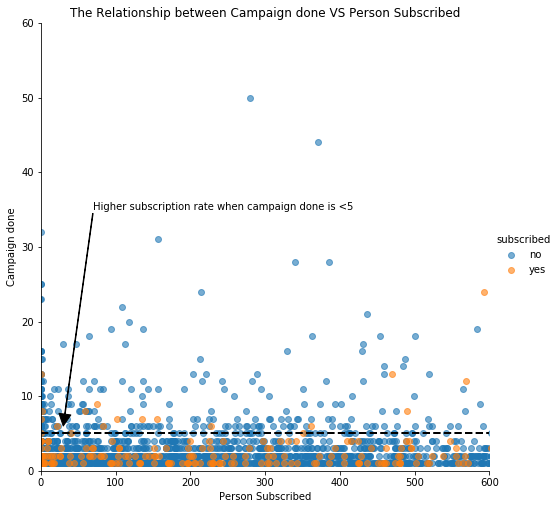

In [53]:
dur_cam = sb.lmplot(x='balance', y='current-campaign',data=df,hue = 'subscribed',fit_reg = False,scatter_kws={'alpha':0.6}, height =7)

plt.axis([0,600,0,60])
plt.ylabel('Campaign done')
plt.xlabel('Person Subscribed')
plt.title('The Relationship between Campaign done VS Person Subscribed')


plt.axhline(y=5, linewidth=2, color="k", linestyle='--')
plt.annotate('Higher subscription rate when campaign done is <5',xytext = (70,35),
             arrowprops=dict(color = 'k', width=0.5),xy=(30,6))
plt.show()

In [65]:
df.head(2)

,age,job,marital,education,default,balance,housing-loan,personal-loan,current-campaign,previous-campaign,subscribed
0,30,unemployed,married,primary,no,1787,no,no,1,0,no
1,33,services,married,secondary,no,4789,yes,yes,1,4,no


In [66]:
dt=df.drop(['previous-campaign','marital','housing-loan'],axis=1)

In [67]:
dt.head(2)

,age,job,education,default,balance,personal-loan,current-campaign,subscribed
0,30,unemployed,primary,no,1787,no,1,no
1,33,services,secondary,no,4789,yes,1,no


In [68]:
exp=dt.to_csv(r'cleaned_bankdata.csv')

#### Now that we cleaned the data, we can use level encoding to make the data useable for the machine learning model

In [56]:
lb=LabelEncoder()

In [69]:
x=dt.iloc[:,0:-1].values
y=dt.iloc[:,-1]

In [70]:
x.shape

(4521, 7)

In [71]:
y.shape

(4521,)

In [72]:
y.value_counts()

no     4000
yes     521
Name: subscribed, dtype: int64

In [73]:
y=lb.fit_transform(y)
y.shape

(4521,)

In [93]:
dty=pd.DataFrame(y,columns=['subscribed'])

In [95]:
dty.head()

,subscribed
0,0
1,0
2,0
3,0
4,0


In [100]:
x[:,1]=lb.fit_transform(x[:,1])
x[:,2]=lb.fit_transform(x[:,2])
x[:,3]=lb.fit_transform(x[:,3])
x[:,4]=lb.fit_transform(x[:,4])
x[:,5]=lb.fit_transform(x[:,5])
x[:,6]=lb.fit_transform(x[:,6])

In [101]:
x.shape

(4521, 7)

In [110]:
dtx=pd.DataFrame(x,columns=['age','job','education','default','balance','personal_loan','Current_campaign',])

In [111]:
dtx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 7 columns):
age                 4521 non-null object
job                 4521 non-null object
education           4521 non-null object
default             4521 non-null object
balance             4521 non-null object
personal_loan       4521 non-null object
Current_campaign    4521 non-null object
dtypes: object(7)
memory usage: 247.3+ KB


In [112]:
dtx.head()

,age,job,education,default,balance,personal_loan,Current_campaign
0,30,10,0,0,1475,0,0
1,33,7,1,0,2030,1,0
2,35,4,2,0,1303,0,0
3,30,4,2,0,1352,1,3
4,59,1,1,0,274,0,0


In [113]:
exp1=dtx.to_csv(r'dtx.csv')

In [114]:
exp1=dty.to_csv(r'dty.csv')